In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("10kcc.csv")


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
#split the data randomly into train and test sets to do exploratory analysis
from sklearn.model_selection import train_test_split
y = data['Class']
X = data.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=10)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.333, stratify=y_train,random_state=10)
train = pd.concat([X_train, y_train],axis=1)
validation = pd.concat([X_validate, y_validate],axis=1)
test = pd.concat([X_test, y_test],axis=1)



,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,4982.0,6016.032517,4488.675492,0.0,2099.0,4638.5,10419.25,15010.0
1,19.0,9359.473684,3123.363792,472.0,7850.0,8528.0,11762.00,14073.0


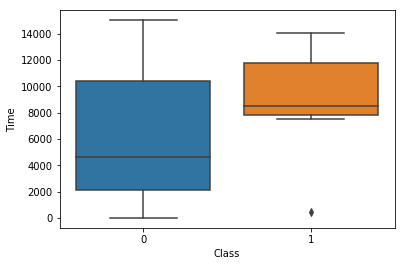

In [33]:
sns.boxplot(x="Class", y="Time",data=train)
train.groupby("Class").Time.describe()

In [34]:
print(data.columns)
print(data.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(9999, 31)


In [35]:
X_train['Time'].describe()

count     5001.000000
mean      6028.735053
std       4488.772796
min          0.000000
25%       2102.000000
50%       4652.000000
75%      10433.000000
max      15010.000000
Name: Time, dtype: float64

In [36]:
#convert the time from seconds to hours to make interpretation easy
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

C:\Users\Dev\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
X_train['Time'].max() 

4.169444444444444

In [38]:
X_train['Amount'].describe()

count    5001.000000
mean       62.818978
std       195.263629
min         0.000000
25%         5.080000
50%        15.950000
75%        50.370000
max      7712.430000
Name: Amount, dtype: float64

Text(0.5,1,'outlier count')

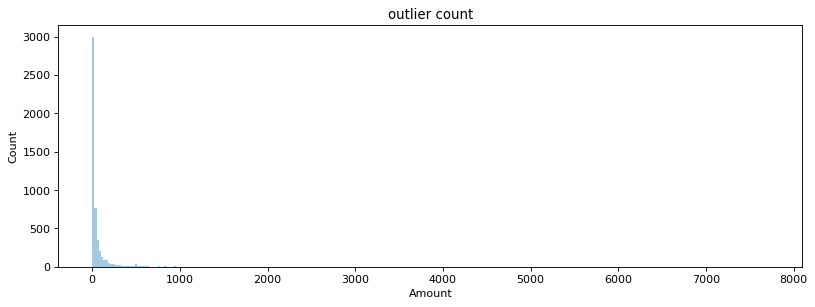

In [39]:
#The data looks a bit skewed, so verifying it with a histogram
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('outlier count')

Text(0.5,1,'outlier count')

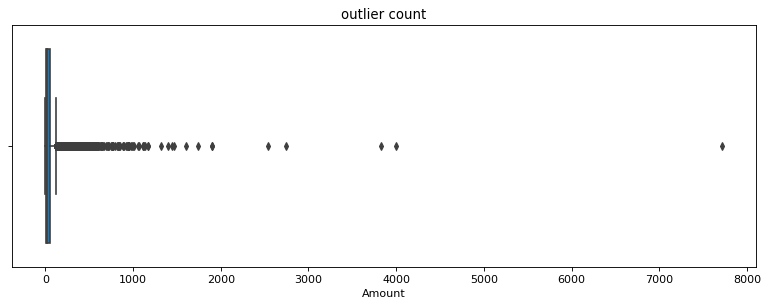

In [40]:
#To get better clarity about the outliers. I'm plotting a boxplot
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title("outlier count")

In [42]:
#We can see there are no outliers on the left and many outliers on the right. So the amounts certainly seem right-skewed. We can calculate the skewness to be sure
X_train['Amount'].skew()


17.861543124485003

In [43]:
#Descriptive stats of the variables v1-v28
#creating a for loop
head_var = ['V%i' % k for k in range(1,29)]

In [44]:
X_train[head_var].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,...,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,-0.237234,0.267433,0.903448,0.273081,-0.039600,0.137517,-0.083898,-0.065438,0.801290,-0.229688,...,-0.074086,0.020257,-0.051027,-0.145779,-0.033387,0.029217,0.089937,0.104915,0.007668,0.003902
std,1.553874,1.357176,1.179913,1.462029,1.281592,1.347837,1.161291,1.250709,1.158617,1.091434,...,0.828993,0.596891,0.883448,0.617780,0.535118,0.593854,0.432289,0.559802,0.403409,0.263546
min,-27.670569,-34.607649,-15.031714,-4.573540,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.136698,...,-4.932733,-12.834042,-11.273890,-8.527145,-15.144340,-2.468339,-2.577363,-1.338556,-5.944408,-3.509250
25%,-1.027505,-0.210717,0.412208,-0.628498,-0.643270,-0.624104,-0.539572,-0.191987,0.065772,-0.686864,...,-0.561745,-0.157880,-0.265288,-0.540269,-0.166422,-0.319206,-0.154894,-0.330574,-0.084017,-0.015622
50%,-0.368639,0.283456,0.944119,0.224652,-0.157203,-0.150213,-0.069587,0.010475,0.816890,-0.338627,...,-0.078864,-0.022437,-0.121413,-0.130589,-0.043975,0.082359,0.130038,0.041686,-0.003791,0.015022
75%,1.155223,0.886013,1.606814,1.136061,0.357057,0.514119,0.475670,0.274773,1.513093,0.179330,...,0.450451,0.156089,0.034013,0.244992,0.084526,0.418351,0.362542,0.454116,0.116369,0.075771
max,1.960497,8.287421,4.017561,10.463020,34.099309,21.393069,34.303177,4.620804,10.392889,12.259949,...,4.555359,8.012574,22.588989,4.393846,10.475770,2.192626,2.419792,3.517346,8.254376,4.556697


Text(0.5,1,'V1-V28 Means')

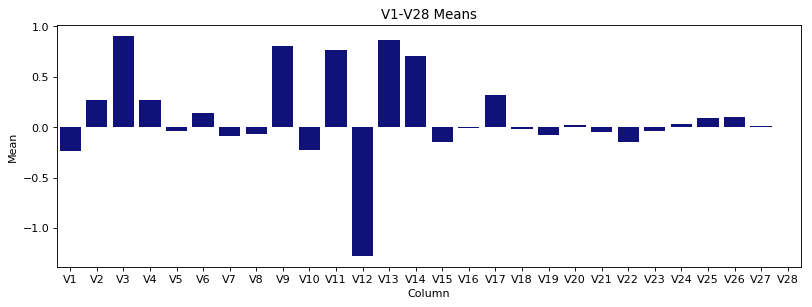

In [51]:
#plotting the mean
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=head_var, y=X_train[head_var].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5,1,'V1-V28 Standard Deviations')

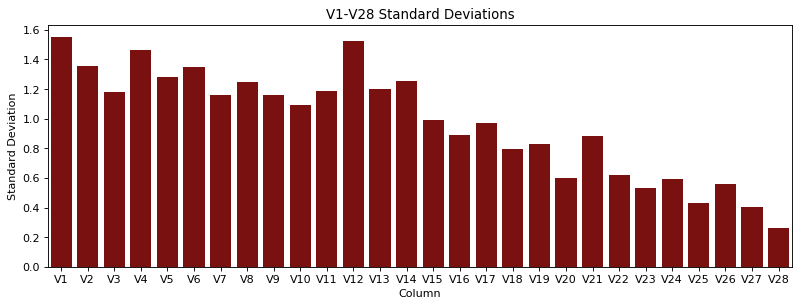

In [52]:
#plotting standard deviation
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=head_var, y=X_train[head_var].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')

Text(0.5,1,'V1-V28 Skewnesses')

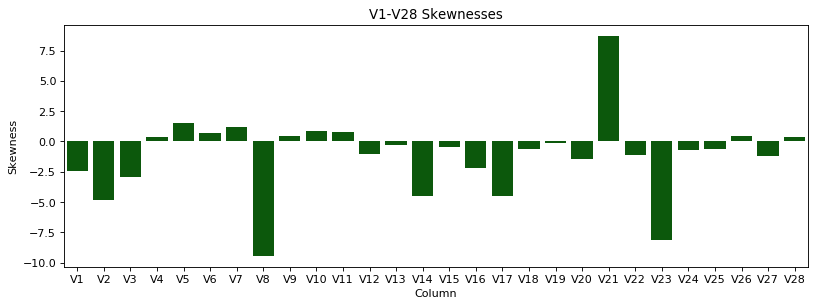

In [53]:
#plotting Skewness
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=head_var, y=X_train[head_var].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

Text(0.5,1,'V8')

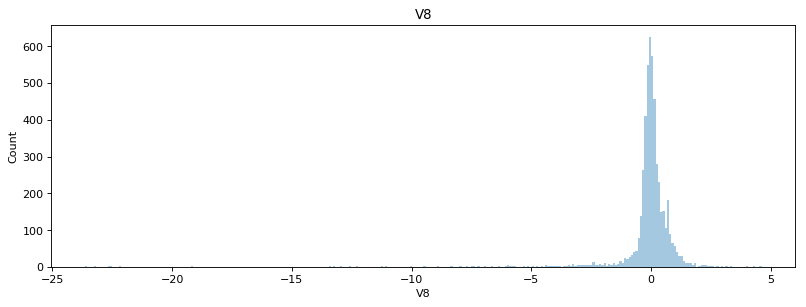

In [54]:
# plot a histogram of one of the particularly skewed variables, V8, to see the distribution in detail.
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')

Text(0.5,1,'V8')

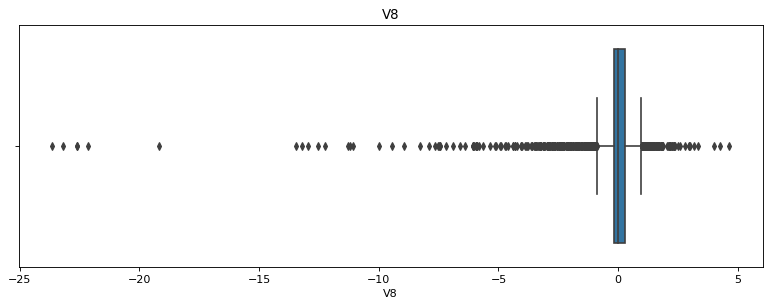

In [55]:
#plot a box plot to see the outliers
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

Text(0.5,1,'V1-V28 Kurtoses')

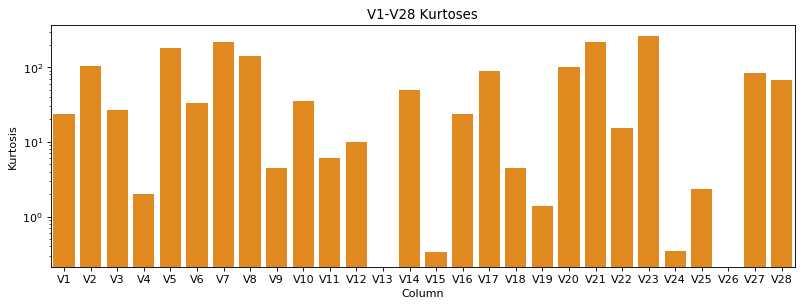

In [56]:
#Using the Kurtosis method because it the outliers are large in number
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=head_var, y=X_train[head_var].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

Text(0.5,1,'V1-V28 Medians')

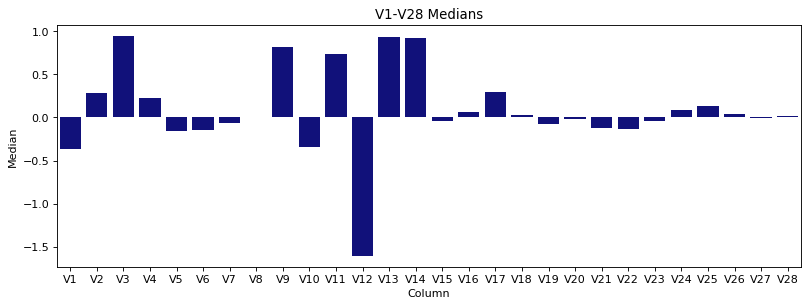

In [57]:
# A lot of variables are heavy tailed. So let's use descriptive statistics and try to plot the medians
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=head_var, y=X_train[head_var].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

Text(0.5,1,'V1-V28 IQRs')

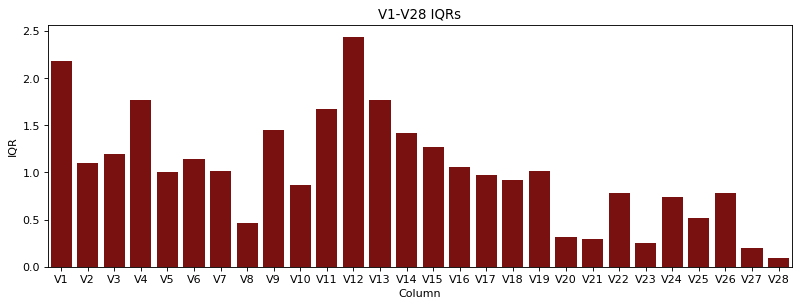

In [58]:
#As the medians are also close to zero lets try thr Interquartile ranges,I am using the quantile method 
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=head_var, y=X_train[head_var].quantile(0.75) - X_train[head_var].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

In [59]:
#The IQR of the variables are similar like the standard Deviations.